In [1]:
import re
from bs4 import BeautifulSoup
import requests
import json
import datetime
import codecs

In [2]:
cmt = input()
cmtu2 = r'http://coral.qq.com/article/'+str(cmt)+r'/comment/v2?callback=_article'+str(cmt)+r'commentv2&orinum=30&oriorder=o&pageflag=1&cursor='
cmtu3 =r'&scorecursor=0&orirepnum=2&reporder=o&reppageflag=1&source=1&_=1540911539487'
url1 = cmtu2 +'0' +cmtu3
url1

3616861095


'http://coral.qq.com/article/3616861095/comment/v2?callback=_article3616861095commentv2&orinum=30&oriorder=o&pageflag=1&cursor=0&scorecursor=0&orirepnum=2&reporder=o&reppageflag=1&source=1&_=1540911539487'

In [2]:
%%time
headers = {
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36'
        }
ct = []
ctid = []
ctn = []
tt = []
last = 0
cmt = input()
cmtu2 = r'http://coral.qq.com/article/'+str(cmt)+r'/comment/v2?callback=_article'+str(cmt)+r'commentv2&orinum=30&oriorder=o&pageflag=1&cursor='
cmtu3 =r'&scorecursor=0&orirepnum=2&reporder=o&reppageflag=1&source=1&_=1540911539487'
#txt = codecs.open('newscomment.txt','a',encoding = 'utf-8')

baosong_list = []
while 1:
    cmtu = cmtu2+str(last)+cmtu3
    t1 = requests.get(cmtu,headers = headers)
    #print(t1.encoding)
    t2 = t1.text
    t3 = re.search('\\((.+)\\)',t2)
    t4 = json.loads(t3.group(1))
    oriretnum = t4['data']['oriretnum']
    #print(oriretnum)
    if not t4['data']['last']:
        #print('Á¨¨%dÊù°Êñ∞ÈóªÁà¨ÂèñÂÆåÊØïÔºÅÊ†áÈ¢òÔºö%s'%(i+1,namelist[i]))
        break;
    for j in range(oriretnum):
        c_t = t4['data']['oriCommList'][j]['content']
        ct.append(c_t)
        ct_id = t4['data']['oriCommList'][j]['userid']
        ctid.append(ct_id)
        t_t = t4['data']['oriCommList'][j]['time']
        t_t_ = datetime.datetime.fromtimestamp(int(t_t)).strftime('%Y-%m-%d %H:%M:%S')
        tt.append(t_t_)
        ct_n = t4['data']['userList'][str(ct_id)]['nick']
        ctn.append(ct_n)
        baosong = '‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚Äú'+ct_n+'‚ÄùÔºö'+c_t
        baosong_list.append(baosong)
        #print('‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚Äú%s‚ÄùÔºö%s'%(ct_n,c_t))
        print(baosong)
        
        #js_ctn = json.dumps('„ÄêÈùûÊ≠£Âºè-Ê≠£Èù¢„Äë‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚Äú'+ct_n+'‚ÄùÔºö'+c_t,ensure_ascii=False)+'\n'
        #txt.write(js_ctn)
        #true_cmt.append('„ÄêÈùûÊ≠£Âºè-Ê≠£Èù¢„Äë‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚Äú'+ct_n+'‚ÄùÔºö'+c_t)
    #print(true_cmt)
    last = t4['data']['last']
#txt.close()
#print(baosong_list)
oritotal = t4['data']['oritotal']
print('\nÂÖ±Êúâ%dÊù°ËØÑËÆ∫'%oritotal)

3835922081
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúËÆ∏Â§öÂπ¥‰ª•Âêé‚ÄùÔºöÂπ∏Á¶è‰∏ç‰ºö‰ªéÂ§©ËÄåÈôçÔºåÂ∞èÂ∫∑Á§æ‰ºöÁ≠â‰∏çÊù•„ÄÇÊâìÂ•ΩËÑ±Ë¥´ÊîªÂùöÊàòÔºå‰∏ÄÊñπÈù¢Ë¶ÅÂùöÂÜ≥Ê†πÈô§‚ÄúÁ≠âÈù†Ë¶Å‚ÄùÁöÑÊÄùÁª¥ÔºåÂÖãÊúçÁïèÈöæÊÉÖÁª™ÔºåÊï¢ÈóØÊï¢ÊãºÔºå‰∏ªÂä®ÊäïË∫´‰∫éÊñ∞Êó∂‰ª£ÁÅ´ÁÉ≠ÁöÑÂ•ãÊñóÂ§ßÊΩÆÔºåÂú®ËÑ±Ë¥´ÊîªÂùöÁöÑ‰ºüÂ§ß‰∫ã‰∏ö‰∏≠Âãá‰∫é‰Ωú‰∏∫ÔºõÂè¶‰∏ÄÊñπÈù¢ÔºåË¶ÅÁî®Â•Ω‚ÄúÁ≤æÂáÜÊâ∂Ë¥´‚ÄùËøô‰∏™ÊîøÁ≠ñÊ≥ïÂÆùÔºåÊâéÊâéÂÆûÂÆû‰ªé‰∏ÄÊùë‰∏ÄÂØ®ÁöÑÂÆûÈôÖÊÉÖÂÜµÂá∫ÂèëÔºåÊë∏Ê∏Ö‚ÄúËÄÅÂ∫ïÂ≠ê‚Äù„ÄÅÂºÄÂØπ‚ÄúËçØÊñπÂ≠ê‚Äù„ÄÅÊãîÊéâ‚ÄúÁ©∑Ê†πÂ≠ê‚ÄùÔºåÊääÊâ∂Ë¥´ËµÑÈáëÁî®Âú®ÂàÄÂàÉ‰∏äÔºåËÆ©Êâ∂Ë¥´ÊîøÁ≠ñÊâìÈÄö‚ÄúÊúÄÂêé‰∏ÄÂÖ¨Èáå‚ÄùÔºåÁúüÁúüÊ≠£Ê≠£ÊääÊâ∂Ë¥´Â∑•‰ΩúÂÅöÂà∞Ê†π‰∏ä„ÄÅÁÇπ‰∏äÔºåËß£ÂÜ≥Â•ΩÂõ∞ÈöæÁæ§‰ºóÁöÑÂèëÂ±ïÈóÆÈ¢ò„ÄÇ
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÂπ∏Á¶è‚ÄùÔºöÁâπËâ≤Á§æ‰ºöÊñ∞Êó∂‰ª£Ôºå
ËÑ±Ë¥´ÊîªÂùöÊ∞ëÁß∞Âø´„ÄÇ
ÂøµÂÖπÂú®ÂÖπÂøÉÁâµÊåÇÔºå
ÂøÉÁ≥ªÂ∞ëÊï∞Ê∞ëÊóèÂ§ßÊÉÖÊÄÄ„ÄÇ
ÂÖ±ÂïÜËÑ±Ë¥´Ëá¥ÂØåËÆ°Ôºå
ËÑ±Ë¥´ËâØÊñπ‰∏ªÂ∏≠ÂºÄ„ÄÇ
‰∫∫Ê∞ëËµ∂‰∏äÂ•ΩÊó•Â≠êÔºå
ÂÆûÁé∞ËÑ±Ë¥´Âπ∏Á¶èÊù•„ÄÇ
Ê∞∏ËøúÁ¥ßË∑ü‰π†‰∏ªÂ∏≠Ôºå
ËæπÁñÜÊú™Êù•Êõ¥ÁíÄÁí®„ÄÇ
‚ÄúËÖæËÆØÊñ∞Èóª

‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚Äúsevenup‚ÄùÔºöÁ≤æÂáÜÊâ∂Ë¥´ÔºåÊâìÂ•ΩËÑ±Ë¥´ÊîªÂùöÊàòÔºåÂÅöÂà∞‰∏Ä‰∏™Ê∞ëÊóèÔºå‰∏Ä‰∏™ÂÆ∂Â∫≠Ôºå‰∏Ä‰∏™‰∫∫ÈÉΩ‰∏çËÉΩÂ∞ëÔºÅ
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÊùéÁéâÊ¢Ö‚ÄùÔºöÁ°Æ‰øùËÑ±Ë¥´ÊîªÂùö‰ªªÂä°:‚Äú‰∏Ä‰∏™Ê∞ëÊóè„ÄÅ‰∏Ä‰∏™ÂÆ∂Â∫≠„ÄÅ‰∏Ä‰∏™‰∫∫ÈÉΩ‰∏çËÉΩÂ∞ëÔºÅ‚Äù
‰π†‰∏ªÂ∏≠ËØ¥Âà∞ÂÅöÂà∞ÔºåËØ¥ÁöÑÁúüÂ•Ω„ÄÇËøôÊòØÁôæÂßì‰πãÁ¶èÔºÅÔºÅ
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚Äú‰∏É‰∏É‚ÄùÔºöÁõ∏‰ø°Âú®‰π†‰∏ªÂ∏≠ÁöÑÂ∏¶È¢Ü‰∏ãÔºåÊàë‰ª¨ÁöÑÁ•ñÂõΩË∂äÊù•Ë∂äÁæéÂ•ΩÔºÅ
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúMiller‚ÄùÔºöËÑ±Ë¥´ÊîªÂùöÂÖãÈöæÂõΩÂÆ∂ÈáçÁÇπËÆ°Âàí
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÂêëÂæÄËá™Áî±‚ÄùÔºöÂ¶ÇÊâÄÊúâÂπ≤ÈÉ®ÈÉΩËøôÊ†∑ÔºåÁ•ñÂõΩ‰ºöÊõ¥Âä†ÂØåÂº∫üëç
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚Äúyoki‚ÄùÔºöËÑ±Á¶ªË¥´Âõ∞Ôºå‰∏Ä‰∏™Ê∞ëÊóè„ÄÅ‰∏Ä‰∏™ÂÆ∂Â∫≠„ÄÅ‰∏Ä‰∏™‰∫∫ÈÉΩ‰∏çËÉΩÂ∞ë„ÄÇ
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÂº†Â∑•‚ÄùÔºö‰π†‰∏ªÂ∏≠ËøòÂú®ÁôæÂøô‰πã‰∏≠Â§öÊ¨°ÂõûÂ§ç‰π°‰∫≤‰ª¨ÁöÑÊù•‰ø°Ôºå‰ø°‰∏≠È•±Âê´ÂØπÂ∞ëÊï∞Ê∞ëÊóèË¥´Âõ∞Áæ§‰ºóÁöÑÊ∑±Ê∑±ÁâµÊåÇÔºå‰π†‰∏ªÂ∏≠Âº∫Ë∞ÉËÆ©‰∫∫Ê∞ëËøá‰∏äÂπ∏Á¶èÁæéÂ•ΩÁîüÊ¥ªÊòØÊàë‰ª¨ÁöÑÂ•

‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÂàùÂøÉ‚ÄùÔºöÂ∞ëÊï∞Ê∞ëÊóèÂú∞Âå∫ÁöÑËÑ±Ë¥´ÊîªÂùöÔºåÁî±‰∫éÂÖ∂Âú∞ÁêÜ„ÄÅÁéØÂ¢ÉÂíåÂéÜÂè≤Á≠âÂõ†Á¥†ÔºåÊòØÊàëÂõΩÂÆûÁé∞ÂÖ®Èù¢ËÑ±Ë¥´ÊîªÂùöÁöÑÂÖ≥ÈîÆ„ÄÇ
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÁÅµËäù‚ÄùÔºöÂÖ®Èù¢ËÑ±Ë¥´ÔºåÂùöÂÆö‰∏çÁßª„ÄÇÂÖ®Èù¢Â∞èÂ∫∑ÔºåÊ∞∏ÂæÄÁõ¥Ââç„ÄÇËØ¥Âà∞ÂÅöÂà∞ÔºåËØö‰ø°‰∫éÊ∞ë„ÄÇÂçÉÂè§ÈöæÂØªÁöÑÂ•ΩÈ¢ÜË¢ñ„ÄÇ‰π†‰∏ªÂ∏≠Ëã±Êòé„ÄÇ
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÂ∞ΩÂ§¥‚ÄùÔºö‰π†‰∏ªÂ∏≠ÂøÉËøû‰∫øÊ∞ë‰∏é‰∫∫Ê∞ëÊ∞∏ËøúÂøÉËøûÂøÉÂú®‰∏ÄËµ∑
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÊ≥™Ê¥íÂ∞òÁºòÔºÅÔºÅÔºÅ‚ÄùÔºöÂÖöÊ≤°ÊúâÂøò‰∫ÜÂ∞ëÊï∞Ê∞ëÊóèÔºÅÂÖöÂú®Êàë‰ª¨ÂøÉ‰∏≠Ôºå‰∏≠ÂõΩÂÖ±‰∫ßÂÖö‰∏áÂ≤ÅÔºÅÊàëÂ∫ÜÂπ∏ÊàëÊòØ‰∏≠ÂõΩ‰∫∫ÔºåÊàë‰ª¨ÁöÑÁîüÊ¥ª‰∏çÊñ≠ÁöÑÊèêÈ´òÔºåÊÑüË∞¢ÂÖöÊÑüË∞¢‰π†‰∏ªÂ∏≠ÔºåÁ•ù‰∏≠ÂõΩÈπèÈ£ûÂèëÂ±ïÂ§ßÂ±ïÂÆèÂõæ„ÄÇ
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÊùéÁîü‚ÄùÔºöËÑ±Ë¥´ÊòØÂÆÉ‰π†‰∏ªÂ∏≠ÂÖ≥ÂøÉËÄÅÁôæÂßìÁöÑ‰∏æÊé™Ôºå‰∏ÄÂÆöË¶ÅÂÆûÁé∞ÔºÅ‰∏∫ÂÆûÁé∞‰∏≠ÂõΩÊ¢¶Âä™ÂäõÂ•ãÊñóÔºÅ
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÂøÉÊÉ≥‰∫ãÊàê‚ÄùÔºöÊîπÂèòÊ∞ëÊóèËÑ±Ë¥´ÊîªÂùö„ÄÇ
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúËÄÅËêùÂçú‚

‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚Äú‰∏çÊä´È©¨Áî≤‰∫Ü‚ÄùÔºöüëçüëçüëçüëçüëçüëç
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚Äúa-18515026220‚ÄùÔºöÂøµËå≤Âú®Ëå≤
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÂ§ñÂ§™Á©∫‚ÄùÔºö‰ΩìÁé∞Â§ßÂÆ∂Â∫≠ÁöÑÈ≠ÖÂäõ
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÂ∏ÖÊ∞îÁöÑÂßöÁæé‰∏Ω‚ÄùÔºö‚ù§Ô∏è
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÊú±‚ÄùÔºöÂÖ¨Âπ≥
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÈùô‚ÄùÔºöÂùöÊåÅËÑ±Ë¥´ÊîªÂùöÔºÅ
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÂë®‚ÄùÔºö‰π†‰∏ªÂ∏≠ÂÖ≥ÂøÉË¥´Ëã¶ÁôæÂßìÔºåÁÇπËµû
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÂ§™Èò≥‚ÄùÔºöÂã§Â•ãÂàõÈÄ†Âπ∏Á¶è
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÂ§©ÈïøÂú∞‰πÖ‚ÄùÔºö‰π†‰∏ªÂ∏≠ÁâµÊåÇ‰∫∫Ê∞ë
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÂ∑¥Â±±Â§úÈõ®‚ÄùÔºöÂ§ßÁà±Êó†ÁñÜ
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúÁºòÂàÜ‚ÄùÔºöüòÅüòÅüòÅüòÅüòÅüòÅ
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚ÄúËÉñÂÖîÂ≠ê‚ÄùÔºöÂÖ®‰∏≠ÂõΩ‰∫∫ÊòØ‰∏ÄÂÆ∂
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚Äújihuguw77h‚ÄùÔºöÂ•ΩÊó•Â≠êËøòÂú®ÂêéÂ§¥ÔºÅ
‚ÄúËÖæËÆØÊñ∞ÈóªÂÆ¢Êà∑Á´Ø‚ÄùÁî®Êà∑‚Äú‰ºä‰∫∫üçìüçìËéüÈ¶ô‚ÄùÔºöË∫´Âú®‰∏≠Âõ

In [1]:
def is_mixed(a, b, s):
    #Â≠óÁ¨¶‰∏≤ËΩ¨Êç¢‰∏∫ÂàóË°®
    a_list = list(a)
    b_list = list(b)
    s_list = list(s)
    
    #Á¥¢ÂºïÂàùÂßãÂåñ
    m = 0
    n = 0
    
    for i,item in enumerate(s_list):
        if a_list[m] == item:
            m+=1
        elif b_list[n] == item:
            n+=1
        else:
            return False
        
    return True
        

a = 'chdkeold'
b = 'jgkhqp'
s = 'cjhdkgkheqopld'
print(is_mixed(a, b, s))

True


In [8]:
def is_mixed(a,b,s):
    m = len(a)
    n = len(b)
    table = [[False for _ in range(n+1)]for _ in range(m+1)]
    print('ÂàùÂßãË°®Ôºö',table)
    
    if m+n !=len(s):
        return False
    
    for i in range(m):
        for j in range(n):
            if i == 0 and j == 0:
                table[i][j] = True
                #print('1:%d and %d is'%(i,j),table[i][j])
            elif i == 0 and b[j-1] == s[j-1]:
                table[i][j] = table[i][j-1]
                #print('2:%d and %d is'%(i,j),table[i][j])
            elif j == 0 and a[i-1] == s[i-1]:
                table[i][j] = table[i-1][j]
                #print('3:%d and %d is'%(i,j),table[i][j])
            
            if i>0 and j>0:
                if a[i-1] == s[i+j-1] and b[j-1] != s[i+j-1]:
                    table[i][j] = table[i-1][j]
                    print('‰∏ÄÂèò',table)
                    print('4:%d and %d is'%(i,j),table[i][j])
                elif a[i-1] != s[i+j-1] and b[j-1] == s[i+j-1]:
                    table[i][j] = table[i][j-1]
                    print('‰∫åÂèò',table)
                    print('5:%d and %d is'%(i,j),table[i][j])
                elif a[i-1] == s[i+j-1] and b[j-1] == s[i+j-1]:
                    table[i][j] = table[i-1][j] or table[i][j-1]
                    print('‰∏âÂèò',table)
                    print('6:%d and %d is'%(i,j),table[i][j])
            else:
                pass
                    
    print(table)
                
    return table[m][n]


a = 'chkdeold'
b = 'jgkhqp'
s = 'cjhkdgkheqopld'

x = 'xxy'
y = 'xxz'
z = 'xxxxzy'
print(is_mixed(a, b, s))
#print(is_mixed(x, y, z))        

ÂàùÂßãË°®Ôºö [[False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False]]
‰∫åÂèò [[True, False, False, False, False, False, False], [True, True, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False]]
5:1 and 1 is True
‰∫åÂèò [[True, False, False, False, False, Fa

In [7]:
def is_mixed(a,b,s):
    if len(a)+len(b)!=len(s):
        return False
    
    if (a == '') and (b == s):
        print(b)
        print(s)
        return True
    elif (a == '') and (b!=s):
        print(s)
        return False;
    
    if (b == '') and (a == s):
        print(a)
        print(s)
        return True
    elif (b == '') and (a!=s):
        print(s)
        return False;
    
    if (s[0] == a[0]) and (s[0] !=b[0]):
        print('a:',s[0])
        print(s)
        if len(a) !=1:
            return is_mixed(a[1:],b[0:],s[1:])
        else:
            return is_mixed('',b[0:],s[1:])
    elif (s[0] == b[0]) and (s[0] != a[0]):
        print('b:',s[0])
        print(s)
        if len(b) !=1:
            return is_mixed(a[0:],b[1:],s[1:])
        else:
            return is_mixed(a[0:],'',s[1:])
    elif (s[0] == a[0]) and (s[0] == b[0]):
        #print('a&b:',s[0])
        return is_mixed(a[1:],b[0:],s[1:]) or is_mixed(a[0:],b[1:],s[1:])
    else:
        #return False
        print('erro:',s[0])
        return False;
    
    
    

a = 'chkdeold'
b = 'jgkhqp'
s = 'cjhkdgkheqopld'

o = 'gsdjakdasfs'
p = 'cbnxcmzx'
q = 'cgsbdnjakxdacmzsfxs'

x = 'ak'
y = 'aaab'
z = 'aaakcb'
#print(is_mixed(a, b, s))
print(is_mixed(x, y, z))
#print(is_mixed(o,p,q))

b: a
aakcb
b: a
akcb
a: k
kcb
cb
b: a
akcb
a: k
kcb
cb
a: k
kcb
cb
erro: k
False


In [92]:
def how_many_ways(n):
    # ÈÄíÂΩíÊñπÊ≥ï
    if (n == 1 or n == 0) : 
        return 1
    elif (n == 2) : 
        return 2
      
    else : 
        return how_many_ways(n - 3) + how_many_ways(n - 2) + how_many_ways(n - 1)
        
def how_many_ways_2(n):
    #Âä®ÊÄÅËßÑÂàíÊñπÊ≥ï
    tab = [0 for i in range(n+1)] 
    tab[0] = 1
    tab[1] = 1
    tab[2] = 2
      
    for i in range(3, n + 1) : 
        tab[i] = tab[i - 1] + tab[i - 2] + tab[i - 3] 
      
    return tab[n]

n = 5 
print('ÈÄíÂΩíÊñπÊ≥ïÔºö',how_many_ways(n))
print('Âä®ÊÄÅËßÑÂàíÊñπÊ≥ïÔºö',how_many_ways_2(n))

ÈÄíÂΩíÊñπÊ≥ïÔºö 13
Âä®ÊÄÅËßÑÂàíÊñπÊ≥ïÔºö 13


In [87]:
def count(n): 
  
    # table[i] will store count of solutions for value i. 
    # Initialize all table values as 0. 
    table = [0 for i in range(n+1)] 
  
    # Base case (If given value is 0) 
    table[0] = 1
  
    # One by one consider given 3 moves and update the 
    # table[] values after the index greater than or equal 
    # to the value of the picked move. 
    for i in range(1, n+1): 
        table[i] += table[i-1] 
    for i in range(2, n+1): 
        table[i] += table[i-2] 
    for i in range(3, n+1): 
        table[i] += table[i-3] 
  
    return table[n]

count(5)

5

In [86]:
class Dp1(object):                                     #Âä®ÊÄÅËßÑÂàíÁ±ª
    def __init__(self,n):                              #ÂàùÂßãÂåñ
        self.mark = [0 for _ in range(n+1)]           #ÂÆö‰πâ‰∏Ä‰∏™‰∏ÄÁª¥Êï∞ÁªÑÔºåÂàùÂßãÂåñÂÖ®ÈÉ®‰∏∫0ÔºåÈïøÂ∫¶‰∏∫Âè∞Èò∂Êï∞„ÄÇÁî®Êù•ÂΩì‰Ωú‚ÄúÂ§áÂøòÂΩï‚Äù„ÄÇ
        print (self.dp(n))                               #ÂºÄÂßãÈÄíÂΩí
    def dp(self,n):                                    #ÈÄíÂΩíÁöÑÊñπÊ≥ï
        self.m = 0                                     #mÁöÑÂê´‰πâÊòØÂΩìÂâçn‰∏™Âè∞Èò∂ÊúâmÁßçË∑≥Ê≥ï
        if self.mark[n] != 0:                          #ÂÖà‰ªéÂ§áÂøòÂΩïÂØªÊâænÔºåËã•Â≠òÂú®mark[n]‰∏çÁ≠â‰∫é0,Âàô‰ª£Ë°®ÊõæÁªèËÆ°ÁÆóËøáÔºån‰∏™Âè∞Èò∂Êúâmark[n]ÁßçË∑≥Ê≥ï
            self.m = self.mark[n]                      #Ëã•Â§áÂøòÂΩïÊúâÔºåÂàôÁõ¥Êé•ÂæóÂà∞nÂ±ÇÂè∞Èò∂ÁöÑÁ≠îÊ°à
        elif n <= 0:                                   #‰ªéËøôÈáåÂºÄÂßãÁöÑÂõõË°åÊòØÁî®Êù•Âà§Êñ≠‚ÄúËæπÁïåÈóÆÈ¢ò‚Äù
            if n == 0:                                 #Ëã•ÂàöÂ•ΩË∑≥ÂÆåÂè∞Èò∂ÔºåÂàôËøôÊ†∑ÁÆó‰∏ÄÁßçÊñπÊ≥ï
                self.m = 1                             #mÂèòÊàê1,‰ª£Ë°®ÊòØ‰∏ÄÁßçÂèØË°åÊñπÊ≥ï
            else:                                      #ÊúâÂèØËÉΩË∑≥ÁöÑÂè∞Èò∂Ë∂ÖËøáÂÆûÈôÖÂè∞Èò∂Êï∞
                self.m = 0                             #m‰∏∫0,‰ª£Ë°®‰∏çÂèØË°å
        elif n>0:                                      #ËøôÈáå‰∏§Ë°åÊòØÁî®‰∫éËßÑÂàíËΩ¨ÁßªÊñπÁ®ãÂºèÔºàÂÖ∂ÂÆûËøôÈáåÂæàÁÆÄÂçïÔºâÔºåÈùíËõôÂè™Êúâ‰∏§ÁßçÂèØËÉΩÔºåË∑≥‰∏ÄÂ±ÇÊàñËÄÖË∑≥‰∏§Â±Ç„ÄÇ
            self.m = self.dp(n-3)+self.dp(n-2)+self.dp(n-1)         #ÂΩìÂâçnÂ±ÇÂè∞Èò∂ÁöÑËß£‰∏™Êï∞ Á≠â‰∫é n-1Â±ÇÂè∞Èò∂ÁöÑËß£ + n-2Â±ÇÂè∞Èò∂ÁöÑËß£
        self.mark[n] = self.m                          #ÊäämÊîæÂÖ•Â§áÂøòÂΩïÔºå‰∏ãÊ¨°Ëã•ÊòØÂÜçÊ¨°ÊòØnÂ±ÇÂè∞Èò∂ÔºåÂàô‰∏çÁî®ËÆ°ÁÆóÁõ¥Êé•ÂèñÂ§áÂøòÂΩïÁöÑÊï∞„ÄÇÔºà‰ºòÂåñÔºâ
        return self.m                                  #ËøîÂõû
 
if __name__ == '__main__':
    dp1 = Dp1(6)


24


In [94]:
#chr(ord('a'))
import sys
sys.maxsize

9223372036854775807

In [64]:
from collections import Counter

dict(Counter(list(s)))

{'c': 1,
 'j': 1,
 'h': 2,
 'd': 2,
 'k': 2,
 'g': 1,
 'e': 1,
 'q': 1,
 'o': 1,
 'p': 1,
 'l': 1}

In [1]:
import pandas as pd

f = open(r'C:\Users\hujia\Desktop\16.csv')
data = pd.read_csv(f)
f.close()

In [2]:
data['ÁúÅ‰ªΩ'].value_counts()

ÂÖ®ÂõΩ     9
ÊµôÊ±ü     9
ÊπñÂåó     7
ÂõõÂ∑ù     7
Âπø‰∏ú     7
Ê≤≥Âçó     6
Âåó‰∫¨     6
Â±±‰∏ú     5
ÊπñÂçó     5
Ê±üË•ø     5
‰∏äÊµ∑     5
Á¶èÂª∫     5
‰∫ëÂçó     4
ÂÆâÂæΩ     4
ÈôïË•ø     3
Ê≤≥Âåó     3
Ê±üËãè     3
ÈáçÂ∫Ü     2
Â§©Ê¥•     1
Êó•Êú¨     1
ÂêâÊûó     1
ÂπøË•ø     1
ÈªëÈæôÊ±ü    1
Name: ÁúÅ‰ªΩ, dtype: int64

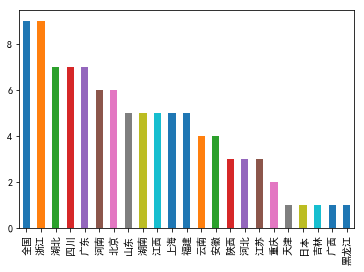

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['simhei'] #Áî®Êù•Ê≠£Â∏∏ÊòæÁ§∫‰∏≠ÊñáÊ†áÁ≠æ
plt.rcParams['axes.unicode_minus']=False #Áî®Êù•Ê≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑

data['ÁúÅ‰ªΩ'].value_counts().plot(kind = 'bar')
#plt.show()

In [5]:
t = data['ÁúÅ‰ªΩ'].value_counts()
type(t)

pandas.core.series.Series

In [6]:
from pyecharts import Map

m = Map('',title_pos = 'center',title_text_size = 24,width = 1000,height = 600)
m.add('',
    t.index.tolist(),
    t.values.tolist(),
    maptype = 'china',
    is_label_show = True,
    is_visualmap = True,
    visual_pos = '10%',
    visual_top = '50%',
    visual_range = [0,10],
    visual_range_text = ['‰Ωé','È´ò'],
    visual_range_color = ['#FDF5E6','#FFA500','#FF0000']
)
m

In [22]:
from pyecharts import Map

data = {
    "ÈÇ±Âéø":190619,
"Á£ÅÂéø":197351,
"ËÇ•‰π°Âå∫":69398,
"ÊàêÂÆâÂéø":79588,
"È≠èÂéø":204345,
"Â≥∞Â≥∞ÁüøÂå∫":93145,
"ÈÇØÂ±±Âå∫":98403,
"‰∏õÂè∞Âå∫":110069,
"‰∏¥Êº≥Âéø":111463,
"Â§çÂÖ¥Âå∫":75636,
"Ê∂âÂéø":231457,
"È∏°Ê≥ΩÂéø":78629,
"Ê∞∏Âπ¥Âå∫":113273,
"Êõ≤Âë®Âéø":136088,
"Â§ßÂêçÂéø":174591,
"Ê≠¶ÂÆâÂ∏Ç":389771,
"ÂπøÂπ≥Âéø":138713,
"È¶ÜÈô∂Âéø":142933
    }

n = Map('',title_pos = 'center',title_text_size = 24,width = 1000,height = 600)
n.add('',
    list(data.keys()),
    list(data.values()),
    maptype = 'ÈÇØÈÉ∏',
    is_label_show = True,
    is_visualmap = True,
    label_pos = 'bottom',
    label_text_size = '16',
    visual_pos = '10%',
    visual_top = '50%',
    visual_range = [0,400000],
    visual_range_text = ['‰Ωé','È´ò'],
    visual_range_color = ['#FDF5E6','#FFA500','#FF0000'],
    is_map_symbol_show=False
)
#n._get_all_options()
#n.get_js_dependencies()
#n.print_echarts_options()
n

In [3]:
from pyecharts import datasets

datasets.coordinates.search_coordinates_by_keyword('‰∏õÂè∞Âå∫')
#datasets.coordinates._load_coordinates()


{'‰∏õÂè∞Âå∫': [114.64, 36.63]}

In [3]:
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)


ValueError: 
To use the 'notebook' renderer, you must install the vega package
and the associated Jupyter extension.
See https://altair-viz.github.io/getting_started/installation.html
for more information.


In [3]:
# This is an example snippet!
# To create your own, add a new snippet block to the
# snippets.json file in your jupyter nbextensions directory:
# /nbextensions/snippets/snippets.json
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Loading BokehJS ...

In [46]:
def twoSum(nums,target):
    output = []
    for i,item in enumerate(nums):
        n = target-item
        if n in nums :
            if i != nums.index(n):
                output.append(i)
                output.append(nums.index(n))
            else:
                continue

        return output

In [47]:
num = [3,2,4]
tar = 6
twoSum(num,tar)

[1, 2]